<a href="https://colab.research.google.com/github/inticoy/study-machine-learning/blob/master/dacon/bikeseoul/bikeseoul_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 및 전처리

## CSV 파일 읽기
- Pandas.read_csv("파일_경로")

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-04-07 04:37:45--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-04-07 04:37:45--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 173.194.218.101, 173.194.218.100, 173.194.218.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ovjbtj5db8fl7ogp4a3u948pbcrsd4lh/1649306250000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download [following]
--2022-04-07 04:37:46--  https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0r

In [2]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## 자주 사용하는 함수
- dataframe.shape -> (rows, columns)
- dataframe.head(number) -> number개 만큼의 데이터 확인 및 열 이름 확인
  - 기본 값은 5
  - 유사한 함수로 dataframe.tail(number) 도 있음.
- dataframe.describe() -> 여러가지 통계 데이터 표시

In [3]:
train.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [6]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


## 데이터 시각화

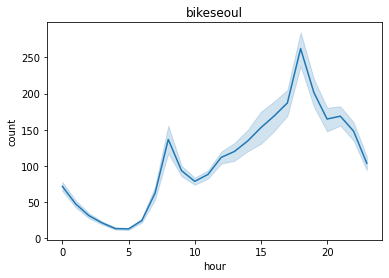

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

train_copy = train.copy()

sns.lineplot(data=train_copy, x="hour", y="count")
plt.title("bikeseoul") # 그래프 제목 지정
plt.show() # 그래프 그리기

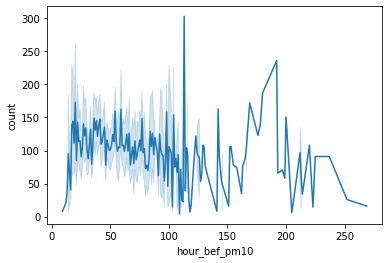

In [22]:
sns.lineplot(data=train_copy, x="hour_bef_pm10", y="count")
plt.title("bikeseoul") # 그래프 제목 지정
plt.show() # 그래프 그리기

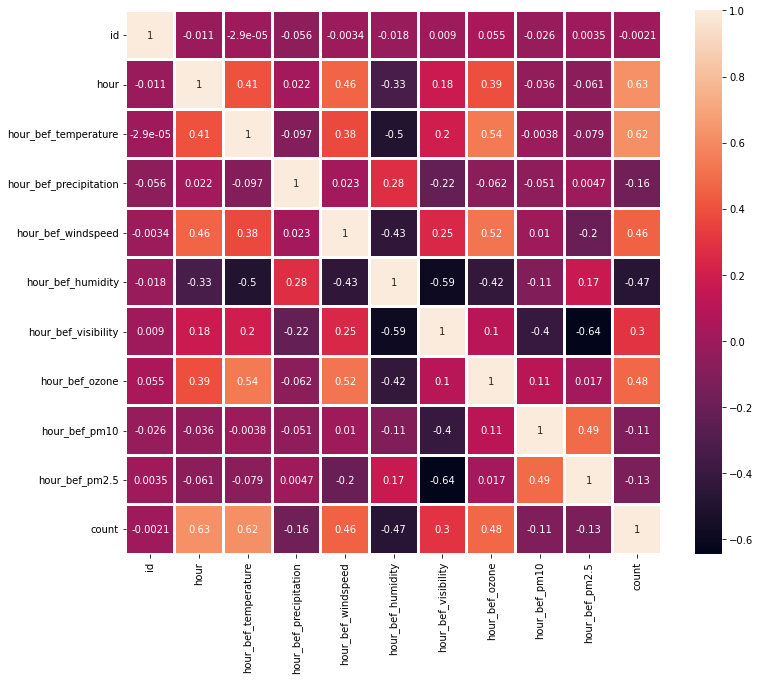

In [27]:
plt.subplots(figsize=(12, 10))
sns.heatmap(train_copy.corr(), annot=True, linewidths=2)

## 결측치 확인
- dataframe.isnull() 데이터가 NaN(Null) 인지 Boolean 값으로 표시
- dataframe.isnull().sum() 모든 열의 NaN 데이터가 몇 개인지 합산
- dataframe.info() 결측치 및 변수 타입 확인

In [28]:
train.isnull()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,False
1455,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


## 결측치 대체
- dataframe.dropna() 결측치 데이터 삭제
- dataframe.fillna(number) number 값으로 결측치를 대체

In [29]:
train = train.dropna()
test = test.fillna(0)

# 모델링

## 모델 선언

In [30]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

## X와 Y 데이터 설정

In [32]:
X_train = train.drop(["id", "hour_bef_precipitation", "hour_bef_pm10", "hour_bef_pm2.5", "count"], axis = 1)
Y_train = train["count"]

In [33]:
model.fit(X_train, Y_train)

DecisionTreeRegressor()

## 예측

In [44]:
X_test = test.drop(["id", "hour_bef_precipitation", "hour_bef_pm10", "hour_bef_pm2.5"], axis = 1)

In [45]:
pred = model.predict(X_test)

In [46]:
pred[:5]

array([ 32., 304., 121.,  18., 134.])

## 제출

In [47]:
len(pred)

715

In [48]:
submission = pd.read_csv("data/submission.csv")
submission["count"] = pred
submission.to_csv("sub.csv", index=False)